<h1><center>Car Accident Severity</center></h1>

<h4>About this Notebook</h4>
In this notebook,I have implemented IBM Data Science capstone project on Car Accident Severity, dealing with predicting severity of accident based on addresstype(intersection,alley,block),junctiontype,weather,light and road condition. So based on which my target field is Severity code and features are Addrtype,Junctiontype,Weathercond,Lightcond and Roadcond.

<h3>Approach</h3>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#data_understanding">Data Undersdtanding</a></li>
        <li><a href="#data_exploration">Exploratory Data Analysis</a></li>
        <li><a href="#predictivemodeling">Predictive Model Development and Evaluation</a></li>
        <li><a href="#knn">K nearest neighbor (KNN</a></li>
        <li><a href="#decisiotree">Decision Tree</a></li>
        <li><a href="#logistic">Logistic Regression</a></li>
    </ol>
</div>
<br>
<hr>


In [107]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline


<h2 id="data_understanding">Data Understanding</h2>

In [108]:

#downloading dataset - it takes few seconds to run
!wget -nv -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
#read the data    
df = pd.read_csv("Data-Collisions.csv")
df.head(10)

2020-09-17 15:54:11 URL:https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv [73917638/73917638] -> "Data-Collisions.csv" [1]


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [109]:
#shape of the data
df.shape

(194673, 38)

In [110]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

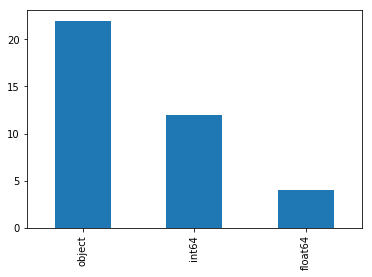

In [111]:
df.dtypes.value_counts().plot(kind='bar')

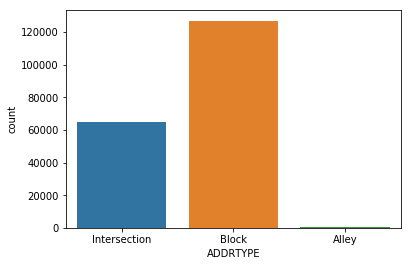

In [112]:
sns.countplot(df['ADDRTYPE'], data=df)

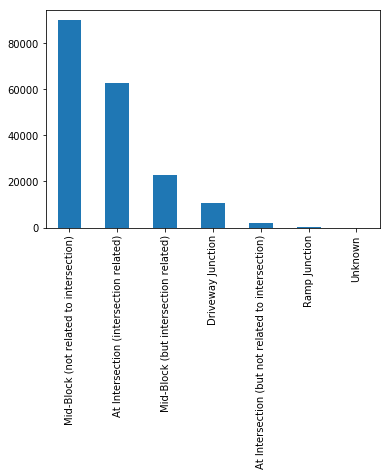

In [114]:
df.JUNCTIONTYPE.value_counts().plot(kind='bar')

In [115]:
#dropping irrelevent columns

df = df.drop(['X', 'Y','OBJECTID', 'COLDETKEY','STATUS','REPORTNO', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE','INCDATE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT',
       'INCDTTM', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)
df.head(5)

,SEVERITYCODE,INCKEY,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1307,Intersection,At Intersection (intersection related),Overcast,Wet,Daylight
1,1,52200,Block,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On
2,1,26700,Block,Mid-Block (not related to intersection),Overcast,Dry,Daylight
3,1,1144,Block,Mid-Block (not related to intersection),Clear,Dry,Daylight
4,2,17700,Intersection,At Intersection (intersection related),Raining,Wet,Daylight


#### Missing values

In [116]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE       0
INCKEY             0
ADDRTYPE        1926
JUNCTIONTYPE    6329
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [117]:
#replace missing values with 'Others'
df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')


df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

In [118]:
Null_values = df.isnull().sum()
Null_values[0:15]

SEVERITYCODE    0
INCKEY          0
ADDRTYPE        0
JUNCTIONTYPE    0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

In [119]:
#Finding duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


### Exploratory Data Analysis

In [120]:
#summarize statistics using pandas dataframe
df.describe()

,SEVERITYCODE,INCKEY
count,194673.000000,194673.000000
mean,1.298901,141091.456350
std,0.457778,86634.402737
min,1.000000,1001.000000
25%,1.000000,70383.000000
50%,1.000000,123363.000000
75%,2.000000,203319.000000
max,2.000000,331454.000000


In [121]:
df["WEATHER"].unique()

array(['Overcast', 'Raining', 'Clear', 'others', 'Unknown', 'Other',
       'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'],
      dtype=object)

In [122]:
df["LIGHTCOND"].unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'others', 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

In [123]:
df["ROADCOND"].unique()

array(['Wet', 'Dry', 'others', 'Unknown', 'Snow/Slush', 'Ice', 'Other',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'], dtype=object)

In [124]:
df["ADDRTYPE"].unique()

array(['Intersection', 'Block', 'Alley', 'others'], dtype=object)

In [125]:
df["JUNCTIONTYPE"].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', 'others',
       'Unknown', 'Ramp Junction'], dtype=object)

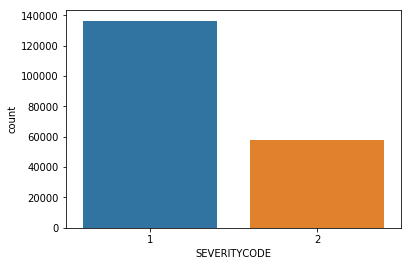

In [126]:
sns.countplot(df['SEVERITYCODE'], data=df)

In [127]:
df.groupby('SEVERITYCODE')['INCKEY'].nunique()

SEVERITYCODE
1    136485
2     58188
Name: INCKEY, dtype: int64

In [138]:
df['INCKEY'].count()

194673

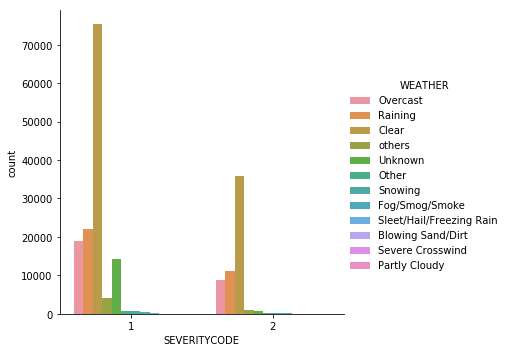

In [129]:
sns.catplot(x="SEVERITYCODE",kind="count", hue="WEATHER", data=df)

In [141]:
#Grouping data applied on catagorical variables
df_test=df[['SEVERITYCODE','LIGHTCOND','INCKEY']]
df_grp=df_test.groupby(['SEVERITYCODE','LIGHTCOND'],as_index=False).count()
df_grp

,SEVERITYCODE,LIGHTCOND,INCKEY
0,1,Dark - No Street Lights,1203
1,1,Dark - Street Lights Off,883
2,1,Dark - Street Lights On,34032
3,1,Dark - Unknown Lighting,7
4,1,Dawn,1678
5,1,Daylight,77593
6,1,Dusk,3958
7,1,Other,183
8,1,Unknown,12868
9,1,others,4080


In [142]:
df_pivot=df_grp.pivot(index='LIGHTCOND',columns='SEVERITYCODE')
df_pivot

INCKEY       
SEVERITYCODE                  1      2
LIGHTCOND                             
Dark - No Street Lights    1203    334
Dark - Street Lights Off    883    316
Dark - Street Lights On   34032  14475
Dark - Unknown Lighting       7      4
Dawn                       1678    824
Daylight                  77593  38544
Dusk                       3958   1944
Other                       183     52
Unknown                   12868    605
others                     4080   1090

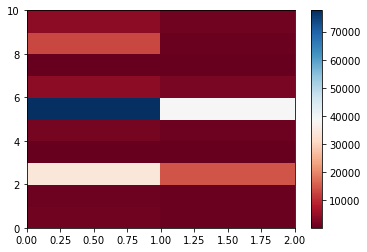

In [143]:
#Plot tarbet variable over multiple variables using Heatmap
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

In [164]:
#Aggregate on specific features with values parameter
grouped = pd.pivot_table(df,index=['SEVERITYCODE'],columns=['ROADCOND'],values=['INCKEY'],aggfunc="count")
grouped

INCKEY                                                         \
ROADCOND        Dry  Ice Oil Other Sand/Mud/Dirt Snow/Slush Standing Water   
SEVERITYCODE                                                                 
1             84446  936  40    89            52        837             85   
2             40064  273  24    43            23        167             30   

                                    
ROADCOND     Unknown    Wet others  
SEVERITYCODE                        
1              14329  31719   3952  
2                749  15755   1060

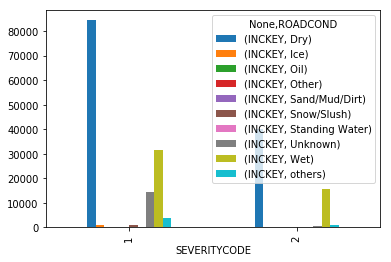

In [165]:
grouped.plot(kind='bar')

In [167]:
#pivoting data analysis based on Weather condition
df.pivot_table(index=['SEVERITYCODE','ADDRTYPE'],aggfunc='count')

INCKEY  JUNCTIONTYPE  LIGHTCOND  ROADCOND  WEATHER
SEVERITYCODE ADDRTYPE                                                        
1            Alley            669           669        669       669      669
             Block          96830         96830      96830     96830    96830
             Intersection   37251         37251      37251     37251    37251
             others          1735          1735       1735      1735     1735
2            Alley             82            82         82        82       82
             Block          30096         30096      30096     30096    30096
             Intersection   27819         27819      27819     27819    27819
             others           191           191        191       191      191

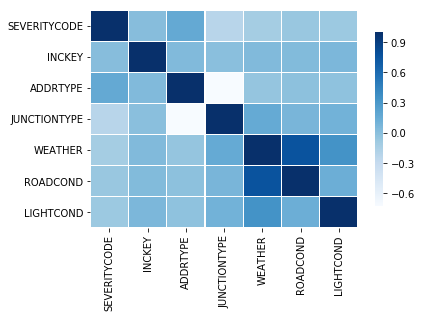

In [176]:
sns.heatmap(df.corr(),cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})

### Encoding the data - Conversion of catagorical variables to numerical values

Features in this dataset are categorical WEATHER,ROADCOND,LIGHTCOND, Sklearn KNN,Decision Trees,Logistic models do not handle categorical variables. But still we can convert these features to numerical values.

In [168]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

In [169]:
df.head()

,SEVERITYCODE,INCKEY,ADDRTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,1307,2,1,4,8,5
1,1,52200,1,4,6,8,2
2,1,26700,1,4,4,0,5
3,1,1144,1,4,1,0,5
4,2,17700,2,1,6,8,5


In [170]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

## Predictive Model Development & Evaluation

In [172]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

**Train Test Split**

In [177]:
#split the data

X = df[['INCKEY','ADDRTYPE','JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
y = df['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [178]:
print("Train set size")
print(X_train.shape)
print(y_train.shape)
print('')
print("Test set size")
print(X_test.shape)
print(y_test.shape)

Train set size
(155738, 6)
(155738,)

Test set size
(38935, 6)
(38935,)


### K nearest neighbor (KNN)

**Train model and Predict for K values from 1 to 25** 

In [183]:
#it takes few seconds to run
Ks = 25
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model using Training data set
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    #Prediction using Test data set
    yhat=neigh.predict(X_test)
    #Finding accuracy of the model comparing actual and predicted values from test dataset
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.59833055, 0.67206883, 0.62542699, 0.67484269, 0.64430461,
       0.67851547, 0.65555413, 0.68231668, 0.66639271, 0.68437139,
       0.67345576, 0.68997046, 0.67913189, 0.69125466, 0.68262489,
       0.69343778, 0.68622062, 0.69487608, 0.68881469, 0.69569796,
       0.69169128, 0.69764993, 0.69410556, 0.69911391])

**Plot model accuracy for Different number of Neighbors**

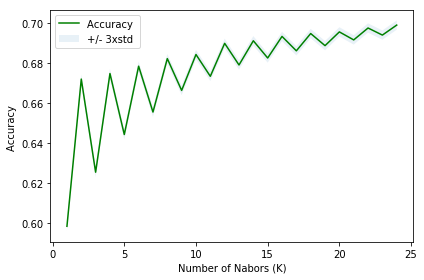

In [184]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [185]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.699113907795043 with k= 24


### Decision Tree

**Model development** 

In [179]:
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Train model using Training data set**

In [180]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

**Prediction using Test data set**

In [181]:
predTree = dTree.predict(X_test)

In [182]:
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 1]
94063     1
137563    2
78237     1
105763    1
138711    1
Name: SEVERITYCODE, dtype: int64


**Model Evaluation- Finding accuracy of the model**

In [183]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Evaluating accuracy of the model using actual and predicted values of test dataset
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.7026839604468986


## Logistic Regression

**Model development**

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#Training model using training data set
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [185]:
#Predicting values using test dataset
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [186]:
#predicting probability of 1 or 0 using test data set
yhat_prob = LR.predict_proba(X_test) #predict_probability
yhat_prob

array([[0.62593211, 0.37406789],
       [0.68905437, 0.31094563],
       [0.60596091, 0.39403909],
       ...,
       [0.56748586, 0.43251414],
       [0.68027414, 0.31972586],
       [0.66150667, 0.33849333]])

**Model Evaluation- Finding accuracy of the model**

In [187]:
#Evaluating accuracy of the model using actual and predicted values of test dataset
print('Score:',accuracy_score(yhat, y_test))
print('F1-Score:',f1_score(yhat, y_test))
print('')
print('Confusion Martix:')
print(confusion_matrix(y_test, yhat))
print('')
print('Classification Report:')
print (classification_report(y_test, yhat))

Score: 0.7026839604468986
F1-Score: 0.8253838959785199

Confusion Martix:
[[27359     0]
 [11576     0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27359
           2       0.00      0.00      0.00     11576

   micro avg       0.70      0.70      0.70     38935
   macro avg       0.35      0.50      0.41     38935
weighted avg       0.49      0.70      0.58     38935



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**log loss**

In [188]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6351532318326613

| Model         | Accuracy |
| ------------- |:---------|
| KNN           | 0.69     |
| Decision Tree | 0.70     |  
| Logistic      | 0.70     |    

## Conclusion

I have got a decent accuracy value for all classification algorithms. So the best classifier of this problem are Decision Tree, Logistic and KNN based on their accuracy value. 
By revealing hidden patterns in predicting severity of accidents based on the features Addrtype. Junctiontype, Weather, Road and Light conditions have significant impact on whether to travel or not which often result in injury(Severity 1) and property damage(Severity 2) as per the casestudy. 
